# Sales Analysis

### Import libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Merge 12 months sales data into a single CSV

In [2]:
files = [file for file in os.listdir('C:/Users/chenyi/OneDrive/Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

for file in files: 
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
all_months_data = pd.DataFrame()

for file in files: 
    df = pd.read_csv('C:/Users/chenyi/OneDrive/Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file) 
    all_months_data = pd.concat([all_months_data, df])

#all_months_data.to_csv('all_data.csv', index = False)
#all_months_data.head()

#### Updated dataframe

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

#all_data.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean data

#### Drop rows with NAN

In [5]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna()
all_data.head()

#all_data.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Drop rows with 'Or'

In [7]:
or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
or_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#all_data.shape

#### Convert columns to the correct data type: Quantity, Price to numeric

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#all_data.head()

### Augment data with additional colums

#### Add month column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add city column

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City State'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

In [13]:
month_sales = all_data[['Sales', 'Month']].groupby('Month').sum().rename(columns = {'Sales': 'Month_Sales_Value'})
month_sales.sort_values('Month_Sales_Value', ascending = False)


,Month_Sales_Value
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


In [14]:
month_sales = all_data.groupby('Month').agg(Month_Sales_Value = ('Sales', 'sum'))
month_sales.sort_values('Month_Sales_Value', ascending = False)

,Month_Sales_Value
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


#### Bar chart for sales value of each month

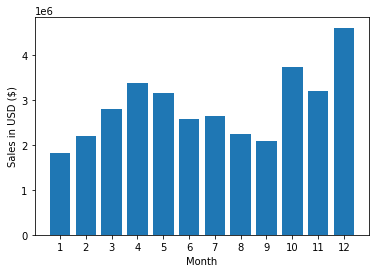

In [16]:
#months = range(1,13)

months = [month for month, data in all_data.groupby('Month')]

plt.bar(months, month_sales['Month_Sales_Value'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

#### Answer 1: December is the month with the greatest amount of sales, which is about $4.6 mil.

### Question 2.1: What city had the highest number of sales (number of transactions)

In [17]:
n_transaction = all_data.groupby('City State')['City State'].count().sort_values(ascending = False)
n_transaction


City State
 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: City State, dtype: int64

In [18]:
n_transaction = all_data.groupby('City State').agg(Number_of_transactions = ('City State', 'count'))
n_transaction.sort_values('Number_of_transactions', ascending = False)


,Number_of_transactions
City State,
San Francisco (CA),44732
Los Angeles (CA),29605
New York City (NY),24876
Boston (MA),19934
Atlanta (GA),14881
Dallas (TX),14820
Seattle (WA),14732
Portland (OR),10010
Austin (TX),9905


#### Bar chart for number of items sold in each city

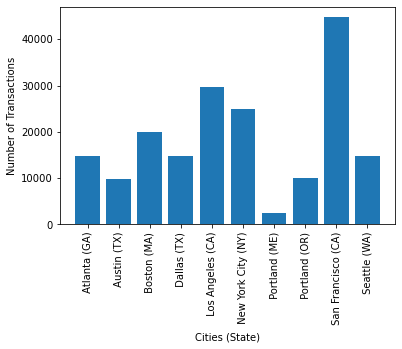

In [19]:
cities = [city for city, data in all_data.groupby('City State')]    

plt.bar(cities, n_transaction['Number_of_transactions'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.ylabel('Number of Transactions')
plt.xlabel('Cities (State)')
plt.show()

#### Answer 2.1: San Francisco is the city with the greatest number of transactions, which is about 44 thousand

### Question 2.2: Which city had the highest amount of sales (sales value)

In [20]:
city_sales = all_data.groupby('City State').agg(City_Sales_Value = ('Sales', 'sum'))
city_sales.sort_values(by = 'City_Sales_Value', ascending = False)


,City_Sales_Value
City State,
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


#### Bar chart for sales value of each city

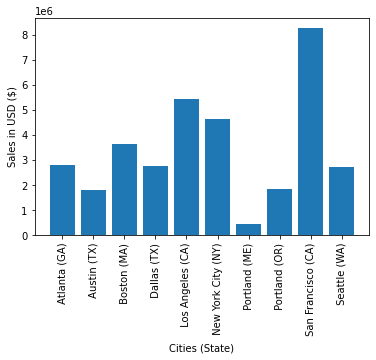

In [21]:
cities = [city for city, data in all_data.groupby('City State')]    # align cities in the same order after groupby

plt.bar(cities, city_sales['City_Sales_Value'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities (State)')
plt.show()

#### Answer 1: San Francisco is the city that generated the greatest sales value, which is about $8.26 mil.


### Question 3: What time should advertisements be displayed to maximize the likelihood of customers' buying products?

#### Convert Order Data into datetime data type

In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Add minute and hour columns

In [23]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Line graph for number of orders made at each hour

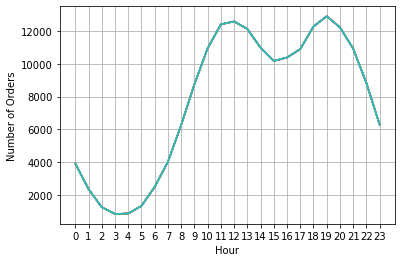

In [24]:
hours = [hour for hour, data in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Answer 3.1: Generally, order peaks took place at 11am and 7pm.This would be the best timing to display advertisements across all regions.

### 3.2.1: Order peaks for different regions - San Francisco (CA)

In [25]:
hours = [hour for hour, data in all_data.groupby('Hour')]
San_Francisco = all_data[(all_data['City State'] == ' San Francisco (CA)')]

#San_Francisco.head()

#### Line graph for number of orders made at each hour in San Francisco

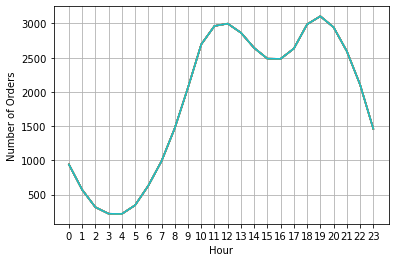

In [26]:
plt.plot(hours, San_Francisco.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### 3.2.2: Order peaks for different regions - Los Angeles (CA)

In [27]:
hours = [hour for hour, data in all_data.groupby('Hour')]
Los_Angeles = all_data[(all_data['City State'] == ' Los Angeles (CA)')]

#Los_Angeles.head()


#### Line graph for number of orders made at each hour in Los Angeles

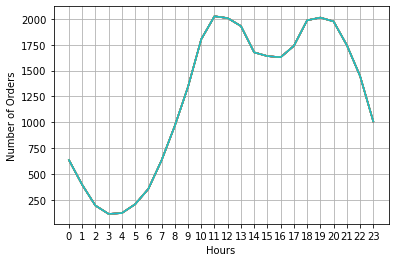

In [28]:
plt.plot(hours, Los_Angeles.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### 3.2.3 Order peaks for different regions - Dallas (TX)

In [29]:
hours = [hour for hour, data in all_data.groupby('Hour')]
Dallas = all_data[(all_data['City State'] == ' Dallas (TX)')]

#Dallas.head()

#### Line graph for number of orders made at each hour in Dallas

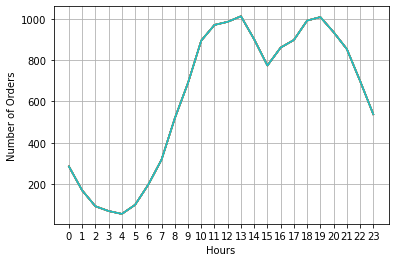

In [30]:
plt.plot(hours, Dallas.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


#### Answer 3.2: Generally, order peaks take place at the same hours at different regions

### Question 4: Which products are most often sold together?

#### Identify orders with multiple items bought together

In [34]:
dup_order = all_data[all_data['Order ID'].duplicated(keep = False)]

dup_order['Grouped'] = dup_order.groupby('Order ID')['Product'].transform(lambda x: ', ' .join(x))

dup_order = dup_order[['Order ID', 'Grouped']].drop_duplicates()

dup_order.head(20)

C:\Users\chenyi\AppData\Local\Temp/ipykernel_20768/616418608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_order['Grouped'] = dup_order.groupby('Order ID')['Product'].transform(lambda x: ', ' .join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


#### Identify most common pairs

In [39]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in dup_order['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

#count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 2140
('Google Phone', ' USB-C Charging Cable') 2116
('iPhone', ' Wired Headphones') 987
('Google Phone', ' Wired Headphones') 949
('iPhone', ' Apple Airpods Headphones') 799
('Vareebadd Phone', ' USB-C Charging Cable') 773
('Google Phone', ' Bose SoundSport Headphones') 503
(' USB-C Charging Cable', ' Wired Headphones') 372
('Vareebadd Phone', ' Wired Headphones') 327
(' Lightning Charging Cable', ' Wired Headphones') 193


### Question 5: Which product sold the most? Why?

In [213]:
product_group = all_data.groupby('Product').agg(Quantity_Sold = ('Quantity Ordered', 'sum'))
product_group.sort_values('Quantity_Sold', ascending = False)
#product_group.shape

,Quantity_Sold
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


In [211]:
#try
product_group = all_data[['Product', 'Quantity Ordered']].groupby('Product')
product_grouped['Quantity_Sold'] = product_group['Quantity Ordered'].groupby('Product').agg('sum')
product_grouped
#product_group.groupby('Product').agg(Quantity_Sold = ('Quantity Ordered', 'sum'))

#product_group['Product'] = all_data['Product']
#product_group['Quantity Sold'] = all_data.groupby('Product').agg(Quantity_Sold = ('Quantity Ordered', 'sum'))
#product_group.sort_values('Quantity_Sold', ascending = False)
#product_group.shape

#month_sales = all_data[['Sales', 'Month']].groupby('Month').sum().rename(columns = {'Sales': 'Month_Sales_Value'})
#month_sales.sort_values('Month_Sales_Value', ascending = False)

AttributeError: 'SeriesGroupBy' object has no attribute 'groupby'

#### Bar chart of products and their quantities sold

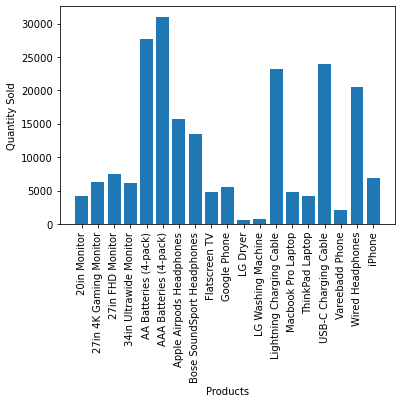

In [214]:
products = [product for product, data in product_group.groupby('Product')]

plt.bar(products, product_group['Quantity_Sold'])
plt.xticks(products, rotation = 'vertical', size = 10)
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\chenyi\AppData\Local\Temp/ipykernel_20768/1059343450.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 10)


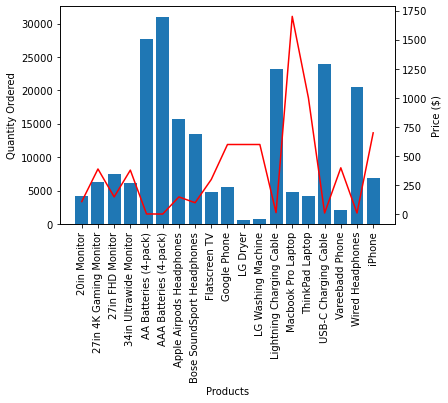

In [228]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1= plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_group['Quantity_Sold'])
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Products')
ax1.set_xticklabels(products, rotation = 'vertical', size = 10)
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')

plt.show()

#### Quantity sold for Top10 most-ordered products

In [193]:
top10 = product_group.head(10)
top10['Quantity_Sold']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
Name: Quantity_Sold, dtype: int64

#### Bar chart for quantities sold for the Top10 products

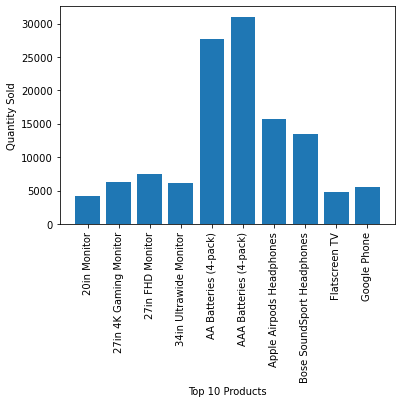

In [157]:
top10_products = [product for product, data in top10.groupby('Product')]

plt.bar(top10_products, top10['Quantity_Sold'])
plt.xticks(top10_products, rotation = 'vertical', size = 10)
plt.xlabel('Top 10 Products')
plt.ylabel('Quantity Sold')
plt.show()

#### Prices of Top10 products

In [162]:
#names?
top10 = pd.DataFrame()

for products in top10_products:
    top10['Product'] = all_data['Product']
    top10['Price per unit'] = all_data['Price Each']

top10.drop_duplicates().sort_values('Price per unit', ascending = True)



,Product,Price per unit
20,AAA Batteries (4-pack),2.99
14,AA Batteries (4-pack),3.84
0,USB-C Charging Cable,11.95
4,Wired Headphones,11.99
12,Lightning Charging Cable,14.95
2,Bose SoundSport Headphones,99.99
35,20in Monitor,109.99
34,27in FHD Monitor,149.99
16,Apple Airpods Headphones,150.00
29,Flatscreen TV,300.00


In [176]:
ten_products = pd.DataFrame()

for products in top10:
    #ten_products['Product'] = top10['Product']
    print(products)
    #ten_products['Price per unit'] = all_data.groupby('Product').mean()['Price Each']

#top10.drop_duplicates().sort_values('Price per unit', ascending = True)

#top10

Quantity_Sold


In [171]:
top10

,Quantity_Sold
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


<AxesSubplot:xlabel='Product'>

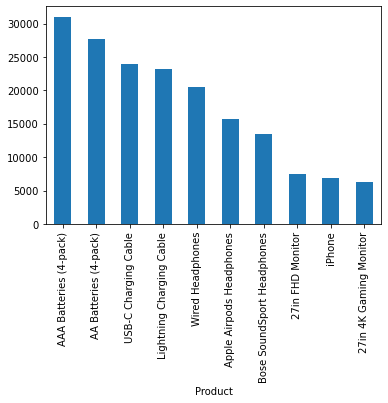

In [231]:
all_data[['Product', 'Quantity Ordered']].groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)[:10].plot(kind='bar')